In [ ]:
# 时间问题 和 降维

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [9]:
data = digits.data  # 特征值
target = digits.target  # 目标值

In [10]:
data.shape

(1797, 64)

In [14]:
data[0]  # 取出一个样本
data[0].shape
data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

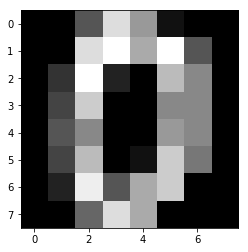

In [17]:
plt.imshow(data[0].reshape(8,8),cmap='gray')

In [4]:
from sklearn.model_selection import train_test_split

In [22]:
# 拆分成 训练集 和 测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# test_size可以不指定 默认比例是 0.25
X_train, X_test, y_train, y_test = train_test_split(data,target)

In [18]:
# 对比 knn 和 lgc逻辑回归 分类 的 时间


In [5]:
# 引入 knn 和 lgc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression  # 别看名字是Regression 实际上是用来分类的

In [26]:
%time knn = KNeighborsClassifier()

Wall time: 0 ns


In [ ]:
# knn的训练是很快的 因为只是记录了一下各个点的位置

In [27]:
%time knn.fit(X_train,y_train)

Wall time: 11 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
# knn在测试的时候 时间就比较长了 247 ms

In [28]:
%time knn.predict(X_test)

Wall time: 247 ms


array([6, 8, 9, 6, 5, 8, 5, 3, 8, 6, 4, 4, 2, 5, 6, 1, 1, 2, 4, 1, 0, 1,
       3, 1, 7, 1, 5, 9, 3, 2, 4, 8, 9, 5, 0, 1, 2, 9, 4, 8, 0, 1, 7, 3,
       1, 4, 1, 8, 3, 4, 1, 3, 5, 9, 2, 7, 7, 5, 0, 8, 9, 7, 4, 1, 8, 9,
       5, 6, 8, 2, 4, 2, 7, 4, 4, 7, 2, 9, 9, 7, 1, 2, 3, 0, 6, 9, 0, 6,
       3, 1, 6, 3, 9, 4, 8, 4, 3, 4, 5, 3, 3, 2, 6, 3, 4, 6, 2, 1, 3, 2,
       5, 9, 7, 6, 0, 8, 1, 3, 8, 2, 3, 1, 5, 9, 6, 6, 6, 4, 6, 3, 9, 6,
       1, 0, 5, 7, 2, 0, 6, 7, 0, 6, 7, 1, 2, 3, 7, 7, 3, 4, 9, 6, 3, 7,
       6, 0, 8, 8, 1, 4, 9, 5, 9, 9, 4, 6, 2, 9, 9, 8, 2, 3, 5, 7, 6, 6,
       0, 2, 7, 5, 8, 8, 1, 6, 0, 5, 9, 1, 4, 9, 1, 0, 6, 6, 2, 1, 4, 6,
       2, 9, 5, 9, 5, 7, 0, 2, 7, 6, 2, 9, 9, 6, 9, 5, 0, 3, 0, 2, 0, 8,
       1, 1, 0, 8, 7, 8, 4, 8, 3, 2, 5, 2, 9, 2, 3, 1, 0, 3, 5, 8, 8, 6,
       4, 9, 2, 0, 5, 7, 3, 0, 6, 1, 1, 6, 4, 4, 9, 7, 8, 0, 3, 9, 1, 1,
       0, 0, 0, 4, 8, 3, 5, 2, 5, 6, 2, 2, 4, 8, 8, 0, 7, 3, 0, 2, 8, 2,
       4, 7, 4, 2, 1, 9, 8, 7, 4, 2, 5, 4, 0, 5, 6,

In [30]:
%time lgc = LogisticRegression()

Wall time: 0 ns


In [ ]:
# 逻辑回归 在 训练的时候 是很慢的 因为要找规律

In [31]:
%time lgc.fit(X_train,y_train)

Wall time: 527 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
# 使用的时候就快了 

In [33]:
%time lgc.predict(X_test)  

Wall time: 3 ms


array([6, 8, 9, 6, 5, 8, 5, 3, 8, 6, 4, 4, 2, 5, 6, 1, 1, 2, 4, 1, 0, 1,
       5, 1, 7, 1, 5, 9, 3, 2, 4, 8, 9, 5, 0, 1, 2, 9, 4, 8, 0, 1, 7, 3,
       1, 8, 1, 8, 3, 4, 1, 3, 5, 9, 2, 7, 7, 5, 0, 8, 9, 7, 8, 1, 8, 7,
       5, 6, 8, 2, 4, 2, 7, 4, 4, 7, 2, 9, 9, 7, 1, 2, 3, 0, 6, 9, 0, 6,
       3, 1, 6, 3, 9, 4, 8, 4, 3, 4, 5, 3, 3, 2, 6, 3, 4, 6, 2, 1, 8, 2,
       5, 9, 7, 6, 0, 8, 1, 3, 8, 2, 3, 1, 5, 8, 6, 6, 6, 4, 6, 3, 9, 6,
       1, 0, 5, 7, 2, 0, 6, 7, 0, 6, 7, 9, 2, 3, 4, 7, 3, 4, 9, 6, 3, 7,
       6, 0, 8, 8, 1, 4, 9, 5, 9, 9, 4, 6, 2, 9, 9, 8, 2, 3, 5, 7, 6, 6,
       0, 2, 7, 5, 8, 8, 1, 6, 0, 5, 9, 1, 4, 9, 1, 8, 6, 6, 2, 1, 4, 6,
       2, 9, 5, 9, 5, 7, 0, 2, 7, 6, 2, 9, 9, 6, 9, 5, 0, 3, 0, 2, 0, 8,
       1, 1, 0, 8, 7, 8, 4, 8, 3, 2, 5, 2, 9, 2, 3, 1, 0, 3, 5, 8, 8, 6,
       4, 9, 2, 0, 5, 7, 3, 0, 6, 1, 1, 6, 4, 4, 9, 7, 8, 0, 3, 9, 1, 1,
       0, 0, 0, 4, 8, 3, 9, 2, 5, 6, 2, 2, 4, 8, 8, 0, 7, 3, 0, 2, 8, 2,
       4, 7, 4, 2, 1, 9, 8, 7, 4, 2, 5, 4, 0, 5, 6,

In [ ]:
# 11 + 247 = 258
# 527 + 3  = 530
# 这里不要看总时长 没有意义
# 最重要的是 predict时候的时间


In [6]:
# 加载csv
df = pd.read_csv('./data/digits.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
target = df['label']  # 目标值
data = df.iloc[:,1:]  # 特征值

In [8]:
target.shape
data.shape  # 28*28

(42000, 784)

In [41]:
784**0.5

28.0

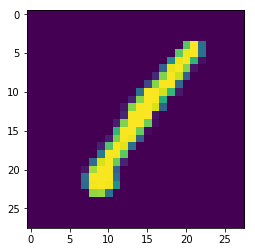

In [9]:
plt.imshow(data.iloc[0].values.reshape(28,28))

In [10]:
# 切分 训练集 和 测试集
X_train,X_test,y_train,y_test = train_test_split(data,target)

In [48]:
knn = KNeighborsClassifier()

In [ ]:
# knn的训练速度已经是比较快的了 结果还26.5秒

In [50]:
%time knn.fit(X_train,y_train)

Wall time: 26.5 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [ ]:
%time y_ = knn.predict(X_test)  # 这个好像是10分钟

In [51]:
lgc = LogisticRegression()

In [ ]:
%time lgc.fit(X_train,y_train)  # 这个训练过程是非常耗时的

In [ ]:
%time lgc.predict(X_test)  # 这个比较快

In [ ]:
# lgc 训练+测试 一个 好像是40分钟

In [ ]:
# 如何提高速度
# pca 降维可以明显提高速度

In [11]:
from sklearn.decomposition import PCA

In [12]:
data.shape

(42000, 784)

In [16]:
X_train = data[:5000]
y_train = target[:5000]
X_test = data[-500:]
y_test = target[-500:]

In [21]:
X_train.shape

(5000, 784)

In [22]:
# n_components 留下的部分（维度 特征）
pca = PCA(n_components=0.9)

In [23]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca_X_train = pca.transform(X_train)  # 经过pca降维后的数据

In [25]:
pca_X_train.shape

(5000, 85)

In [26]:
knn = KNeighborsClassifier()

In [27]:
knn.fit(pca_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
pca_X_test = pca.transform(X_test)

In [35]:
%time knn.score(pca_X_test,y_test)  # 降维之后的

Wall time: 1.13 s


0.94

In [30]:
knn2 = KNeighborsClassifier()

In [31]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
%time knn2.score(X_test,y_test)  # 降维之前的

Wall time: 7.67 s


0.932

In [ ]:
# 逻辑回归

In [32]:
lgc = LogisticRegression()

In [ ]:
# 先看没有降维的数据的效果

In [ ]:
lgc.fit(X_train,y_train)  